# 3. 판다스

### [데이터프레임](#dataframe)

### [연산](#operation)

### [저장](#save)

### [시계열](#timeseries)

### [그래프](#plot)

<a id='dataframe'></a>

# 데이터프레임 생성

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame([[1, 2], [3, 4]])

In [3]:
df

,0,1
0,1,2
1,3,4


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.set_index(0)

,1
0,
1,2
3,4


In [6]:
df = pd.DataFrame([[1, 2], [3, 4], [5, 6]])

In [7]:
df

,0,1
0,1,2
1,3,4
2,5,6


In [8]:
df.columns = ['KOR', 'USA']

In [9]:
df.index = [17, 18, 19]

In [10]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


### 데이터프레임 통계량

In [11]:
df.mean()

KOR    3.0
USA    4.0
dtype: float64

In [12]:
df.mean().to_frame('mean')

,mean
KOR,3.0
USA,4.0


In [13]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


### 슬라이스

In [14]:
df.loc[18:, :]

,KOR,USA
18,3,4
19,5,6


In [15]:
df.loc[17, :]

KOR    1
USA    2
Name: 17, dtype: int64

In [16]:
df.loc[[17]]

,KOR,USA
17,1,2


In [17]:
df = df.loc[18:, :].copy()

### 값 지정

In [18]:
df

,KOR,USA
18,3,4
19,5,6


In [19]:
df.loc[18, 'KOR'] = 0

In [20]:
df

,KOR,USA
18,0,4
19,5,6


In [21]:
df.loc[:, 'USA'] = 1

In [22]:
df

,KOR,USA
18,0,1
19,5,1


In [23]:
df.loc[:, :] = [[1, 2], [3, 4]]

In [24]:
df

,KOR,USA
18,1,2
19,3,4


In [25]:
df = [[1, 2], [3, 4]]

In [26]:
df

[[1, 2], [3, 4]]

## 멀티인덱스

In [27]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'], 
                   'pop':[1, 2, 3, 4], 
                   'gdp':[3, 4, 5, 6]}, 
                  index = [16, 16, 17, 17])

In [28]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [29]:
df = df.set_index('country', append=True)

In [30]:
df

pop  gdp
   country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [31]:
from pandas import MultiIndex as MI

In [32]:
df.index = MI.from_product([['16', '17'], ['미국', '한국']])

In [33]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

In [34]:
df.index = [':'.join(c).strip() for c in df.index.values]

In [35]:
df

,pop,gdp
16:미국,1,3
16:한국,2,4
17:미국,3,5
17:한국,4,6


In [36]:
df.index.str.split(':').tolist()

[['16', '미국'], ['16', '한국'], ['17', '미국'], ['17', '한국']]

In [37]:
df.index = MI.from_tuples(df.index.str.split(':').tolist())

In [38]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

### 다양한 층위에서 데이터 선택

In [39]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'], 
                   'pop':[1, 2, 3, 4], 
                   'gdp':[3, 4, 5, 6]}, 
                  index = [16, 16, 17, 17])

In [40]:
df = df.set_index('country', append=True)

In [41]:
idx = pd.IndexSlice

In [42]:
df.loc[idx[:, 'USA'], :]

,,pop,gdp
,country,,
16,USA,1,3
17,USA,3,5


In [43]:
df.loc[idx[16, 'USA'], :]

pop    1
gdp    3
Name: (16, USA), dtype: int64

In [59]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'], 
                   'pop':[1, 2, 3, 4], 
                   'gdp':[3, 4, 5, 6]}, 
                  index = [16, 16, 17, 17])

In [60]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [46]:
df.loc[df['pop'].ge(3)]

,country,pop,gdp
17,USA,3,5
17,KOR,4,6


In [47]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [48]:
df.loc[df.country.isin(['USA', 'JPN'])]

,country,pop,gdp
16,USA,1,3
17,USA,3,5


# 멀티인덱스 특정 레벨 값 확인하기 및 레벨 줄이기

- index.droplevels()
- index.get_level_values()

In [61]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [62]:
df = df.set_index('country', append=True)

In [63]:
df.index.names = ['yr', 'country']

In [64]:
df

pop  gdp
yr country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [65]:
df.index.get_level_values(0).unique()

Int64Index([16, 17], dtype='int64', name='yr')

In [66]:
df.index.get_level_values(1).unique()

Index(['USA', 'KOR'], dtype='object', name='country')

In [67]:
df = df.loc[idx[:, 'USA'], :]

In [68]:
df

,,pop,gdp
yr,country,,
16,USA,1,3
17,USA,3,5


In [70]:
df.index = df.index.droplevel(level = 1)

In [71]:
df

,pop,gdp
yr,,
16,1,3
17,3,5


# 연습문제

## 1. 연도(2017~2020), 국가별(kr, us, jp) 경제성장률과 물가상승률 데이터프레임을 생성하시오
- 첫번째 열은 연도, 두번째 열은 국가명
- 경제성장률과 물가상승률은 넘파이 랜덤표본 이용

## 2. 연도와 국가명을 인덱스로 지정하시오

## 3. 2018년 이후 국가별 경제성장률과 물가상승률을 나타내시오

<a id='operation'></a>

# 데이터프레임 연산

In [75]:
# 데이터프레임을 병렬로 표시하기 위한 함수 정의
from IPython.display import display_html
def display_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [76]:
df = pd.DataFrame({'KOR':[1, 3], 'USA':[2, 4]})

In [77]:
df1 = df + 10

In [78]:
df1.columns = ['USA', 'CHN']

In [79]:
display_by_side(df1, df + df1)

USA 
 CHN 
 
 
 
 
 0 
 11 
 12 
 
 
 1 
 13 
 14 
 
 
 
 
 
 
 CHN 
 KOR 
 USA 
 
 
 
 
 0 
 NaN 
 NaN 
 13 
 
 
 1 
 NaN 
 NaN 
 17

In [80]:
display(df, df.T)

,KOR,USA
0,1,2
1,3,4


,0,1
KOR,1,3
USA,2,4


In [81]:
df.dot(df.T)

,0,1
0,5,11
1,11,25


In [82]:
df.T.dot(df)

,KOR,USA
KOR,10,14
USA,14,20


In [83]:
df.dot(df)

ValueError: matrices are not aligned

In [84]:
df1 = pd.DataFrame({'USA':[1, 3], 'CHN':[2, 4]})
df2 = pd.DataFrame({'JPN':[2, 4], 'KOR':[6, 8]})

In [85]:
display(df1, df2)

,USA,CHN
0,1,2
1,3,4


,JPN,KOR
0,2,6
1,4,8


In [86]:
pd.concat([df1, df2], axis = 1)

,USA,CHN,JPN,KOR
0,1,2,2,6
1,3,4,4,8


In [87]:
pd.concat([df1, df2], axis = 0)

,USA,CHN,JPN,KOR
0,1.0,2.0,NaN,NaN
1,3.0,4.0,NaN,NaN
0,NaN,NaN,2.0,6.0
1,NaN,NaN,4.0,8.0


### merge

In [88]:
df2.columns = ['CHN', 'KOR']

In [89]:
df1.merge(df2, on = 'CHN', how = 'left')

,USA,CHN,KOR
0,1,2,6
1,3,4,8


### 새로운 열 만들기

In [91]:
df['Total'] = df.sum(axis = 1)
df

,KOR,USA,Total
0,1,2,6
1,3,4,14


In [92]:
df.div(df.Total, axis = 0)

,KOR,USA,Total
0,0.166667,0.333333,1.0
1,0.214286,0.285714,1.0


In [93]:
df.div(df.Total, axis = 1)

,0,1,KOR,Total,USA
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN


### 숫자 데이터를 범주형 데이터로 변환

In [94]:
from numpy.random import randint
df = pd.DataFrame({'a':range(4), 'b':randint(1,10,4)})
df

,a,b
0,0,3
1,1,6
2,2,6
3,3,9


In [95]:
pd.cut(df.b, [0, 5, 10])

0     (0, 5]
1    (5, 10]
2    (5, 10]
3    (5, 10]
Name: b, dtype: category
Categories (2, interval[int64]): [(0, 5] < (5, 10]]

In [96]:
df.loc[:, 'c'] = pd.cut(df.b, [0, 5, 10], labels=False)

In [97]:
df

,a,b,c
0,0,3,0
1,1,6,1
2,2,6,1
3,3,9,1


In [98]:
pd.qcut(df.b, 2)

0    (2.999, 6.0]
1    (2.999, 6.0]
2    (2.999, 6.0]
3      (6.0, 9.0]
Name: b, dtype: category
Categories (2, interval[float64]): [(2.999, 6.0] < (6.0, 9.0]]

## Groupby

In [99]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'], 
                   'pop':[1, 2, 3, 4], 
                   'gdp':[3, 4, 5, 6]}, 
                  index = [16, 16, 17, 17])

In [100]:
df.groupby('country').sum()

,pop,gdp
country,,
KOR,6,10
USA,4,8


In [101]:
df = df[['pop', 'gdp']]

In [102]:
df.groupby(pd.cut(df['pop'], [0, 2, 4]))['gdp'].mean()

pop
(0, 2]    3.5
(2, 4]    5.5
Name: gdp, dtype: float64

## lambda 함수

In [103]:
square = lambda x: x * x

In [104]:
square(2)

4

## apply/applymap/map

In [105]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'], 
                   'pop':[1, 2, 3, 4], 
                   'gdp':[3, 4, 5, 6]}, 
                  index = [16, 16, 17, 17])

In [106]:
df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))

,pop,gdp
16,0.1,0.166667
16,0.2,0.222222
17,0.3,0.277778
17,0.4,0.333333


In [107]:
df = df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))
df.applymap(lambda x: '{:,.2f}'.format(x))

,pop,gdp
16,0.10,0.17
16,0.20,0.22
17,0.30,0.28
17,0.40,0.33


## stack/unstack

In [108]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'], 
                   'pop':[1, 2, 3, 4], 
                   'gdp':[3, 4, 5, 6]}, 
                  index = [16, 16, 17, 17])

df = df.set_index('country', append=True)

In [109]:
df.unstack(level = 1)

pop     gdp    
country KOR USA KOR USA
16        2   1   4   3
17        4   3   6   5

# 연습문제

## 1. 앞에서 계산한 연도(2017~2020), 국가별(kr, us, jp) 경제성장률과 물가상승률 데이터프레임을 이용하여

- 2018년 이후 국가별 평균 경제성장률과 물가상승률을 계산하라
- 2018년 이후 한국과 미국의 연도별 평균경제성장률을 계산하라

## 2. 같은 방식으로 중국(cn)의 경제성장률과 물가상승률 데이터프레임을 생성하여 결합하라

## 3. 4개 국가 평균 경제성장률이 0보다 큰 연도를 표시하라

<a id='timeseries'></a>

# 시계열

In [146]:
import numpy as np
df = pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'])

In [147]:
df

,con,gdp
0,3,9
1,5,18
2,16,4
3,19,18
4,16,18
5,8,8
6,15,14
7,5,6
8,11,9
9,1,11


In [148]:
df.index = pd.date_range('2017-3-31', '2019-12-31', freq='Q')

In [149]:
df

,con,gdp
2017-03-31,3,9
2017-06-30,5,18
2017-09-30,16,4
2017-12-31,19,18
2018-03-31,16,18
2018-06-30,8,8
2018-09-30,15,14
2018-12-31,5,6
2019-03-31,11,9
2019-06-30,1,11


In [150]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [151]:
df.resample('A').sum()

,con,gdp
2017-12-31,43,49
2018-12-31,44,46
2019-12-31,31,31


In [152]:
df.resample('A').last()

,con,gdp
2017-12-31,19,18
2018-12-31,5,6
2019-12-31,3,3


In [153]:
df.resample('A').mean()

,con,gdp
2017-12-31,10.75,12.25
2018-12-31,11.00,11.50
2019-12-31,7.75,7.75


<AxesSubplot:>

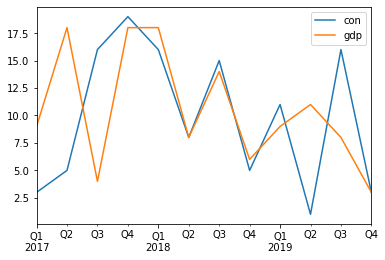

In [154]:
df.plot()

<AxesSubplot:>

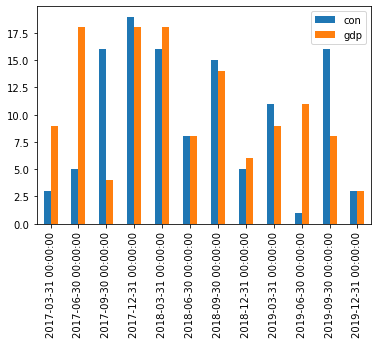

In [155]:
df.plot.bar()

<AxesSubplot:>

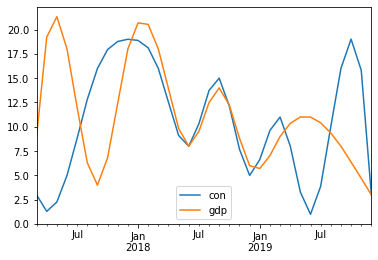

In [156]:
df.resample('M').interpolate(method='cubic').plot()
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

<AxesSubplot:>

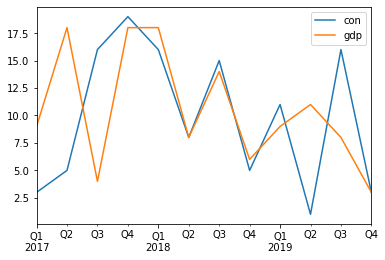

In [157]:
df.plot()
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

In [158]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})

In [159]:
df

,value,date
0,2,20201201
1,4,2019-9-1
2,5,1 jul 2018
3,6,2017q1


In [160]:
df.date = pd.to_datetime(df.date)

In [161]:
df

,value,date
0,2,2020-12-01
1,4,2019-09-01
2,5,2018-07-01
3,6,2017-01-01


In [162]:
df = df.set_index('date')

In [163]:
df

,value
date,
2020-12-01,2
2019-09-01,4
2018-07-01,5
2017-01-01,6


#### 전기 대비 증가율, 차분 등 함수를 적용하기 위해서는 데이터프레임의 데이트타임인덱스가 빠짐없이 순서대로 정렬되어 있는지 확인해야 한다.

In [164]:
df.pct_change()

,value
date,
2020-12-01,NaN
2019-09-01,1.00
2018-07-01,0.25
2017-01-01,0.20


In [165]:
from pandas.tseries.offsets import YearEnd, YearBegin, QuarterEnd, QuarterBegin

In [166]:
df.index = df.index + YearEnd()
df

,value
date,
2020-12-31,2
2019-12-31,4
2018-12-31,5
2017-12-31,6


In [167]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

In [168]:
df.index = df.index + QuarterEnd()
df

,value
date,
2020-12-31,2
2019-09-30,4
2018-09-30,5
2017-03-31,6


## 연도/분기/월 변수 만들기

In [169]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})
df.date = pd.to_datetime(df.date)

In [170]:
df

,value,date
0,2,2020-12-01
1,4,2019-09-01
2,5,2018-07-01
3,6,2017-01-01


In [171]:
df['month'] = df.date.dt.month

In [172]:
df

,value,date,month
0,2,2020-12-01,12
1,4,2019-09-01,9
2,5,2018-07-01,7
3,6,2017-01-01,1


In [173]:
df['day'] = df.date.dt.day

In [174]:
df

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


<a id='save'></a>

# 데이터프레임 저장

In [175]:
pwd

'/Users/hyunchangyi/python2020'

### DF를 pickle()로 저장

- python에서 매우 효율적임

In [176]:
ls

ECOS/           SSD/            WIOT/           tutorial.ipynb*
FFC/            TEST.ipynb      pandas.ipynb*


In [177]:
import os
os.makedirs('pickle')
df.to_pickle('pickle//df.pkl')

In [178]:
ls

ECOS/           SSD/            WIOT/           pickle/
FFC/            TEST.ipynb      pandas.ipynb*   tutorial.ipynb*


In [179]:
cd pickle

/Users/hyunchangyi/python2020/pickle


In [180]:
ls

df.pkl


In [181]:
cd ..

/Users/hyunchangyi/python2020


In [182]:
df1 = pd.read_pickle('pickle//df.pkl')

In [183]:
df1

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


### DF를 csv로 저장

In [184]:
df.to_csv('df.csv')
df_csv = pd.read_csv('df.csv', index_col=0)

### DF를 stata의 자료파일 dta로 저장

In [185]:
df1.to_stata('df.dta')
df1_dta = pd.read_stata('df.dta')

### 각 DF를 엑셀의 시트로 저장

In [186]:
writer = pd.ExcelWriter('dfs.xlsx')
df.to_excel(writer,'df')
df1.to_excel(writer,'df1')
df2.to_excel(writer,'df2')
writer.save()

### 여러 DF를 dictionary로 결합한 다음 pickle()로 저장

In [187]:
dfs = {'df': df, 'df1': df1, 'df2': df2}

In [188]:
import pickle

In [189]:
with open('dfs.pkl', 'wb') as handle:
    pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [190]:
with open('dfs.pkl', 'rb') as handle:
    dfs_pkl = pickle.load(handle)

<a id='plot'></a>

# 그래프 그리기

In [191]:
%matplotlib notebook

<IPython.core.display.Javascript object>


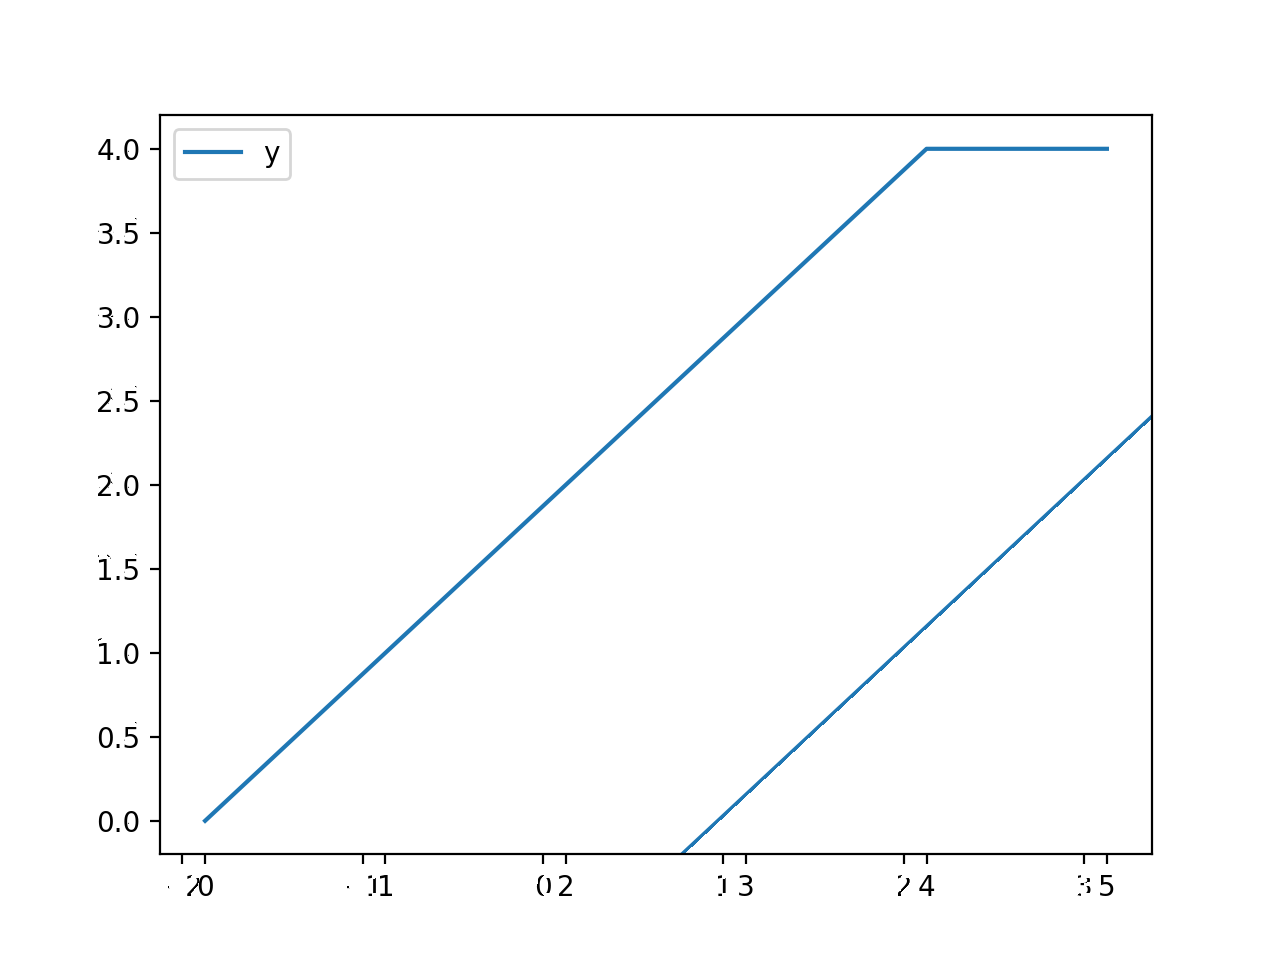

<AxesSubplot:>

In [192]:
df = pd.DataFrame([0, 1, 2, 3, 4, 4], columns = ['y'])
df.plot()

In [194]:
%matplotlib inline

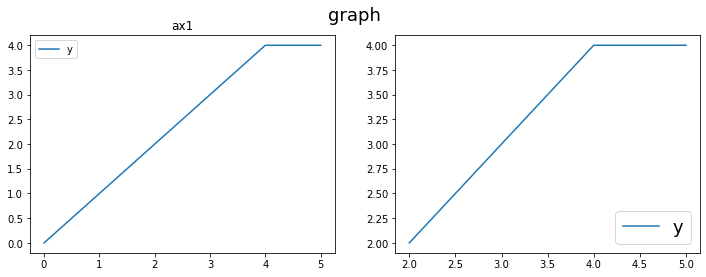

In [200]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax[0])
df.loc[2:].plot(ax=ax[1])
ax[1].legend(loc=4, fontsize=18)
ax[0].set_title('ax1')
fig.suptitle('graph', fontsize=18);

### x, y축 값 표시 포맷

In [ ]:
from matplotlib.ticker import FuncFormatter as FF

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax[0])
df.loc[2:].plot(ax=ax[1])
ax[1].legend(loc=4, fontsize=18)
ax[0].set_title('ax1')
fig.suptitle('graph', fontsize=18);

dp2 = lambda x, p: '{:,.2f}'.format(x)
dp0 = lambda x, p: '{:,.0f}'.format(x)
ax[1].yaxis.set_major_formatter(FF(dp2))
ax[1].xaxis.set_major_formatter(FF(dp0))

<AxesSubplot:xlabel='x', ylabel='y'>

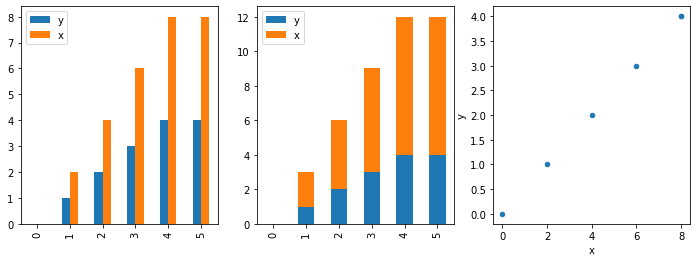

In [201]:
df['x'] = df['y'] * 2

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

df.plot.bar(ax=ax[0])
df.plot.bar(stacked=True, ax=ax[1])
df.plot.scatter(x='x', y='y', ax=ax[2])

### 시계열 막대 그래프

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'],
                  index = pd.date_range('2017-3-31', '2019-12-31', freq='Q'))

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

ticklabels = [pd.to_datetime(t.get_text()).strftime('%b\n%y') for t in ax.get_xticklabels()]
ax.set_xticklabels(ticklabels, rotation=0)

In [ ]:
def xaxis_date_format(ax, fmt = '%y'):
    '''fmt: '%b\n%y', '%y-%m-%d', etc '''
    ticklabels = [pd.to_datetime(t.get_text()).strftime(fmt) for t in ax.get_xticklabels()]
    ax.set_xticklabels(ticklabels, rotation=0)

# 연습문제

## 1. 성인 500명에 대한 키(cm)와 몸무게(kg) 데이터를 아래 관계에 따라 생성하시오

$height \sim norm(170, 15)$

$weight = (height - 100)^{1.2} + u$, $u \sim norm(0, 5)$

## 2. 키와 몸무게 각각에 대한 히스토그램(5 kg/cm 구간)을 subplots을 이용하여 그리시오

## 3. 키 180cm 이상 및 이하로 그룹을 나누어 키와 몸무게의 산포도를 그리시오